To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/foster_in_dev/blob/master/Homeworks/HW%202.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>'

In [1]:
#If opening in colab run this cell
# !git clone https://github.com/bwolfson2/foster_in_dev
# %cd foster_in_dev/Homeworks/

# Part II: Predicting Show-Up

The purpose of this part of the homework is to get you up to speed with data manipulation and model fitting using Python. Ideally, you should be able to start working on your term project after finishing this.

### Background

You've been hired as the manager of Sacred Heart Medical Clinic (SHMC). As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

In [2]:
import pandas as pd

# Path to the data containing past appointments (Remember to change this to the specific path of your data).
data_path = "./data/data-hw2.csv" 

### Loading the data

** 1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and show the first few rows in the dataset. ** 

In [3]:
df = pd.read_csv(data_path)

In [4]:
print("The data has %d lines and %d columns."%(df.shape[0],df.shape[1]))

The data has 110527 lines and 14 columns.


In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here's a brief summary of the variables you should see:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female. 
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor. 
7. Age = How old is the patient. 
8. Neighborhood - Place where the patient lives. 
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient
15. No-show - Whether the patient missed the appointment.

** 2. Check out if there are any Na or NaN values. Drop all the observations that include such values in any of the columns. ** 

In [6]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighborhood    110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Seems no Na/NaN, double check is that in the form of string**

In [8]:
import re

In [9]:
for i in ["Gender", "ScheduledDay", "AppointmentDay", "Neighborhood", "No-show"]:
    
    print("Feature: ", i)
    
    for j in range(len(df)):
    
        if (re.findall(r"Na", df[i][j]) != []):
        
            print(df[i][j])

Feature:  Gender
Feature:  ScheduledDay
Feature:  AppointmentDay
Feature:  Neighborhood
Feature:  No-show


In [10]:
for i in ["Gender", "ScheduledDay", "AppointmentDay", "Neighborhood", "No-show"]:
    
    print("Feature: ", i)
    
    for j in range(len(df)):
    
        df[i][j].find(" ")

Feature:  Gender
Feature:  ScheduledDay
Feature:  AppointmentDay
Feature:  Neighborhood
Feature:  No-show


In [11]:
# if we find na and want to delete that row, but seems we do not have na here.
df = df.dropna()
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Dealing with dates

** 3. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this). **

In [12]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighborhood    110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

** 4. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, "normalize" ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method. **

In [14]:
df["ScheduledDay"] = df["ScheduledDay"].dt.normalize()

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


** 5. Create a new column called 'TimeInAdvance' for the difference in days between ScheduledDay and AppointmentDay. Make sure that the new field includes only integers (and not TimeDelta, which is the difference between two datetimes).**

In [16]:
df['TimeInAdvance'] = df['AppointmentDay'] - df['ScheduledDay']
df['TimeInAdvance'] = df['TimeInAdvance'].dt.days

In [17]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


There are many other features you may want to extract from date variables, such as the time at which the appointment was schedule, the day of the week, the month, etc. However, we will only use TimeInAdvance for the purposes of this homework.

### Cleaning data

**6. Use the "describe" command from pandas to obtain some general stats about the data (in case you forgot about it, take a look at the 'Dealing with data' notebook in Module 1). Do you see any weird values in any of the columns? Remove all observations that include "weird" or wrong values and comment on why did you remove such observations. Also, print the number of observations you removed. **

In [18]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [19]:
print("There are [{}] records where the Waiting Time is less than Zero.".format(df[df["Age"] < 0].shape[0]))

There are [1] records where the Waiting Time is less than Zero.


In [20]:
print("There are [{}] records where the Waiting Time is less than Zero.".format(df[df["TimeInAdvance"] < 0].shape[0]))

There are [5] records where the Waiting Time is less than Zero.


In [21]:
df = df[df["Age"] >= 0] # drop 1 negative age
df = df[df["TimeInAdvance"] >= 0] # drop 5 negative waiting time

### Dealing with binary variables

** 7. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Hint: Take a look at the [where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html) method. Make sure to also drop the Gender column.  **

In [22]:
import numpy as np

df["IsFemale"] = np.where(df["Gender"] == "F", 1, 0)

In [23]:
df = df.drop(["Gender"], axis=1)

In [24]:
df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,IsFemale
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,1
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,1
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,1


** 8. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise. **

In [25]:
df["IsAbsent"] = np.where(df["No-show"] == "Yes", 1, 0)

In [26]:
df = df.drop(["No-show"], axis=1)

In [27]:
df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,IsAbsent
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,0
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,0
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,0


### Dealing with categorical variables

** 9. Let's take a look at the Neighborhood column. How many unique neighborhoods are there? Which are the 5 most common neighborhoods? Which are the 5 least common ones?  ** 

In [28]:
print("There are [{}] unique neighborhoods here".format(len(df["Neighborhood"].unique())))

There are [81] unique neighborhoods here


In [29]:
df["Neighborhood"].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [30]:
neighborhoodCount = pd.DataFrame(df["IsAbsent"].groupby(df["Neighborhood"]).count()).reset_index().sort_values(by = "IsAbsent").reset_index(drop = True)

In [31]:
neighborhoodCount

,Neighborhood,IsAbsent
0,PARQUE INDUSTRIAL,1
1,ILHAS OCEÂNICAS DE TRINDADE,2
2,AEROPORTO,8
3,ILHA DO FRADE,10
4,ILHA DO BOI,35
...,...,...
76,ITARARÉ,3514
77,JARDIM DA PENHA,3877
78,RESISTÊNCIA,4430
79,MARIA ORTIZ,5805


In [32]:
print("5 most common neighborhoods:")

[neighborhoodCount["Neighborhood"][i] for i in range(76,81)]

5 most common neighborhoods:


['ITARARÉ', 'JARDIM DA PENHA', 'RESISTÊNCIA', 'MARIA ORTIZ', 'JARDIM CAMBURI']

In [33]:
print("5 least common neighborhoods:")

[neighborhoodCount["Neighborhood"][i] for i in range(0,5)]

5 least common neighborhoods:


['PARQUE INDUSTRIAL',
 'ILHAS OCEÂNICAS DE TRINDADE',
 'AEROPORTO',
 'ILHA DO FRADE',
 'ILHA DO BOI']

** 10. (Optional, extra points) We often group together categories that are very rare because it's hard to genearlize from them. Find the neighborhoods that appear less than 500 times in the dataset and replace their name with "OTHER". **

In [34]:
neighborhoodLess500 = list(neighborhoodCount[neighborhoodCount["IsAbsent"] < 500]["Neighborhood"])

In [35]:
df[df["Neighborhood"].isin(neighborhoodLess500)]

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,IsAbsent
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,0
70,6.714490e+13,5552914,2016-04-06 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,SOLON BORGES,0,0,0,0,0,0,23,0,0
76,6.549280e+12,5597643,2016-04-18 00:00:00+00:00,2016-04-29 00:00:00+00:00,28,ANTÔNIO HONÓRIO,0,0,0,0,0,0,11,0,1
102,4.225490e+13,5634093,2016-04-28 00:00:00+00:00,2016-04-29 00:00:00+00:00,54,MÁRIO CYPRESTE,0,1,0,0,0,0,1,1,0
119,3.293150e+11,5546448,2016-04-05 00:00:00+00:00,2016-04-29 00:00:00+00:00,33,MÁRIO CYPRESTE,0,0,0,0,0,1,24,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,2016-06-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,45,BARRO VERMELHO,0,0,0,0,0,0,4,1,1
110485,4.865330e+12,5762486,2016-06-02 00:00:00+00:00,2016-06-06 00:00:00+00:00,34,SANTA LUÍZA,0,0,0,0,0,0,4,1,0
110503,2.362180e+13,5759473,2016-06-01 00:00:00+00:00,2016-06-01 00:00:00+00:00,64,SOLON BORGES,0,0,0,0,0,0,0,1,0
110510,2.362180e+13,5757587,2016-06-01 00:00:00+00:00,2016-06-01 00:00:00+00:00,64,SOLON BORGES,0,0,0,0,0,0,0,1,0


In [36]:
df = df.replace(neighborhoodLess500, "OTHER")

In [37]:
df[df["Neighborhood"] == "OTHER"]

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,IsAbsent
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,OTHER,0,0,0,0,0,0,0,1,0
70,6.714490e+13,5552914,2016-04-06 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,OTHER,0,0,0,0,0,0,23,0,0
76,6.549280e+12,5597643,2016-04-18 00:00:00+00:00,2016-04-29 00:00:00+00:00,28,OTHER,0,0,0,0,0,0,11,0,1
102,4.225490e+13,5634093,2016-04-28 00:00:00+00:00,2016-04-29 00:00:00+00:00,54,OTHER,0,1,0,0,0,0,1,1,0
119,3.293150e+11,5546448,2016-04-05 00:00:00+00:00,2016-04-29 00:00:00+00:00,33,OTHER,0,0,0,0,0,1,24,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,2016-06-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,45,OTHER,0,0,0,0,0,0,4,1,1
110485,4.865330e+12,5762486,2016-06-02 00:00:00+00:00,2016-06-06 00:00:00+00:00,34,OTHER,0,0,0,0,0,0,4,1,0
110503,2.362180e+13,5759473,2016-06-01 00:00:00+00:00,2016-06-01 00:00:00+00:00,64,OTHER,0,0,0,0,0,0,0,1,0
110510,2.362180e+13,5757587,2016-06-01 00:00:00+00:00,2016-06-01 00:00:00+00:00,64,OTHER,0,0,0,0,0,0,0,1,0


** 11. Get dummy/indicator variables for each neighborhood and add them to the dataframe. Hint: Take a look at the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method. Make sure to also drop the Neighborhood column. **

In [38]:
pd.get_dummies(df["Neighborhood"])

,ANDORINHAS,BELA VISTA,BENTO FERREIRA,BONFIM,CARATOÍRA,CENTRO,CONQUISTA,CONSOLAÇÃO,CRUZAMENTO,DA PENHA,...,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_dummy = pd.concat([df.drop(["Neighborhood"], axis=1), pd.get_dummies(df["Neighborhood"])], axis=1)

In [40]:
df_dummy

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,SANTO ANDRÉ,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110523,3.596270e+12,5650093,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110524,1.557660e+13,5630692,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110525,9.213490e+13,5630323,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dealing with panel data

** 12. Let's take a look at the PatientsId column. How many patients have made more than one appointment?  **

In [41]:
patientsCount = pd.DataFrame(df["AppointmentDay"].groupby(df["PatientId"]).count()).reset_index().sort_values(by = "AppointmentDay").reset_index(drop = True)

In [42]:
patientsCount

,PatientId,AppointmentDay
0,3.920000e+04,1
1,5.298680e+13,1
2,5.299400e+13,1
3,5.299450e+13,1
4,5.311240e+13,1
...,...,...
61738,2.584240e+11,62
61739,3.353480e+13,65
61740,2.688610e+13,70
61741,9.963767e+10,84


In [43]:
print("There are [{}] patients have made more than one appointment".format(len(patientsCount[patientsCount["AppointmentDay"] > 1])))

There are [24494] patients have made more than one appointment


In [44]:
patientsCount[patientsCount["AppointmentDay"] > 1]

,PatientId,AppointmentDay
37249,1.749640e+13,2
37250,1.476950e+13,2
37251,1.596800e+13,2
37252,7.254390e+12,2
37253,3.333880e+14,2
...,...,...
61738,2.584240e+11,62
61739,3.353480e+13,65
61740,2.688610e+13,70
61741,9.963767e+10,84


As you can see, there are many patients that have made more than one appointment. Panel data (also called longitudinal data) contain observations for the same individuals over multiple periods of time. In our particuclar case, such data may help us to make better predictions. For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. That being said, taking advantage of panel data often requires additional data processing. The following exercise is **optional** and relatively advanced, so feel free to ignore it. 

** 13. (Optional, extra points) Create a new column called "PreviousNoShows" that for each appointment includes the number of past appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). Hint: Sort the dataframe by PatientID and ScheduledDay. Then, group by PatientID and compute the cumulative sum of the No-show variable. All of these things can be done using pandas. **

In [45]:
patientsMoreThanOneAppt = list(patientsCount[patientsCount["AppointmentDay"] > 1]["PatientId"])

In [46]:
len(df["AppointmentID"].unique())

110521

In [47]:
df2 = df[df["PatientId"].isin(patientsMoreThanOneAppt)]
df2 = df2[df2["IsAbsent"] == 1].set_index("AppointmentID", drop = True)
df3 = df2.sort_values(by=["PatientId","ScheduledDay"]).groupby(["PatientId"]).cumsum()
df3["PreviousNoShows"] = df3["IsAbsent"] - 1
df3 = df3.reset_index()

In [48]:
df4 = pd.merge(df_dummy, df3[["AppointmentID","PreviousNoShows"]], on = "AppointmentID", how = "left")
df4["PreviousNoShows"] = df4["PreviousNoShows"].replace(np.nan,0)

In [49]:
df4[df4["PreviousNoShows"] >= 1]

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM,PreviousNoShows
90,8.782530e+14,5595362,2016-04-18 00:00:00+00:00,2016-04-29 00:00:00+00:00,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
216,3.719950e+11,5606885,2016-04-20 00:00:00+00:00,2016-04-29 00:00:00+00:00,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
288,2.246210e+13,5532908,2016-03-31 00:00:00+00:00,2016-04-29 00:00:00+00:00,43,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
415,7.273890e+12,5601968,2016-04-19 00:00:00+00:00,2016-04-29 00:00:00+00:00,29,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
500,3.265240e+12,5483275,2016-03-17 00:00:00+00:00,2016-04-29 00:00:00+00:00,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110424,4.986160e+13,5736999,2016-05-25 00:00:00+00:00,2016-06-01 00:00:00+00:00,57,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
110425,2.175330e+12,5769362,2016-06-03 00:00:00+00:00,2016-06-08 00:00:00+00:00,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
110478,5.133650e+14,5772155,2016-06-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
110486,6.456340e+14,5786741,2016-06-08 00:00:00+00:00,2016-06-08 00:00:00+00:00,33,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [50]:
df4.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,...,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM,PreviousNoShows
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,...,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,10.184345,...,0.024828,0.011545,0.004949,0.013020,0.016612,0.017888,0.022150,0.028329,0.007700,0.069788
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,15.255153,...,0.155601,0.106828,0.070177,0.113361,0.127814,0.132545,0.147171,0.165913,0.087411,0.447484
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172460e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438960e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000


There are many other features we could compute with this data set, such as time between appointments, number of past appointments, fraction of appointments to which the patient did not show up, etc. However, for the purposes of this homework, we will only work with PreviousNoShows.

### Removing the unnecessary

**14. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay. **

In [51]:
df_cleaned = df4.drop(["PatientId","AppointmentID","ScheduledDay","AppointmentDay"], axis = 1)

In [52]:
df_cleaned

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance,IsFemale,IsAbsent,...,SANTO ANTÔNIO,SANTOS DUMONT,SANTOS REIS,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,VILA RUBIM,PreviousNoShows
0,62,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
1,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,62,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
3,8,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
4,56,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110516,56,0,0,0,0,0,1,35,1,0,...,0,0,0,0,0,0,0,0,0,0.0
110517,51,0,0,0,0,0,1,35,1,0,...,0,0,0,0,0,0,0,0,0,0.0
110518,21,0,0,0,0,0,1,41,1,0,...,0,0,0,0,0,0,0,0,0,0.0
110519,38,0,0,0,0,0,1,41,1,0,...,0,0,0,0,0,0,0,0,0,0.0


In [53]:
Y = df_cleaned["IsAbsent"]

In [54]:
X = df_cleaned.drop(["IsAbsent"], axis = 1)

### Predictive modeling

** 15. Let's build a model to predict if someone will not show up using a DecisionTreeClassifier. Report the training accuracy and the cross-validated accuracy using 5 folds. **

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
scores = cross_val_score(model, X_train, Y_train, scoring="accuracy", cv=5)

In [57]:
scores

array([0.78257182, 0.77910988, 0.77368094, 0.77566024, 0.77486852])

** 16. As discussed in class, one way to control the complexity of a decision tree is by enforcing that at least some minimum number of examples from the training set populate each leaf. This is set with the min_samples_leaf parameter. Try values for min_samples_leaf ranging from 1 to 4096 by doubling the number of samples (i.e., 1, 2, 4, 8, ..., 4096). For each value, compute the training accuracy and the cross-validated accuracy. Use the results to plot fitting curves and explain what they show. What do you think is the most appropriate value for min_samples_leaf for this problem? ** 

In [58]:
from sklearn.metrics import accuracy_score

def training_accy(X, y, model):
    y_hat = model.fit(X, y).predict(X)
    return accuracy_score(y, [1 if ty >= 0.5 else 0 for ty in y_hat])

In [59]:
def model_selection(X, y, minSamplesLeaf):
    model = DecisionTreeClassifier(min_samples_leaf = minSamplesLeaf)
    trainingAcc = training_accy(X_train, Y_train, model)
    scores = cross_val_score(model, X_train, Y_train, scoring="accuracy", cv=5)
    CrossSco = scores.mean()
    return trainingAcc, CrossSco

In [60]:
trainingAcc = []
CrossSco = []

In [61]:
samples = [2**i for i in range(13)]
samples

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]

In [62]:
for i in samples:
    trainingAcc_i, CrossSco_i = model_selection(X_train, Y_train, i)
    trainingAcc.append(trainingAcc_i)
    CrossSco.append(CrossSco_i)

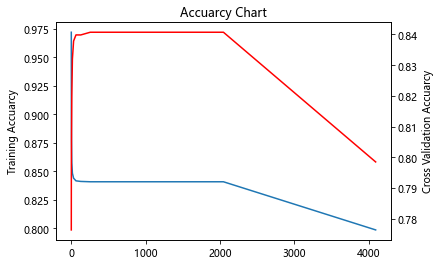

In [63]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(samples, trainingAcc, label="Training Accuarcy")
ax1.set_ylabel("Training Accuarcy")
ax1.set_title("Accuarcy Chart")

ax2 = ax1.twinx()
ax2.plot(samples, CrossSco, "r", label = "Cross Validation Accuarcy")
ax2.set_ylabel("Cross Validation Accuarcy")
ax2.set_xlabel("min_samples_leaf")

plt.show()

** 17. (Optional, extra points) Do you think the accuracy of the model you built is good or not? Why? What other addititonal information would be useful to evaluate whether the model is any good? How would you use that information to evaluate the model? **

I think it's not good enough.

+ We just do in-sample test, without knowing problems such as overfitting, we should use out-of-sample test.

+ We use one-hot to create many features, but many of them may not significantly contribute to the models. Too much features compared to data records.

+ Decision Tree has many parameters, but we just use min_samples_leaf for tuning.

+ We have many other classifiers not just DT.

We need:

+ Out-of-sample data.

+ Feature selection.

+ Other DT parameters.

+ Other models.

We should use:

+ Split train-test data and do out of sample test.

+ Do feature selection, e.g., correlation test, Multi-Dimensional Linear Model, Beam Search, Sequential Backward Selection, XGBoost, etc.

+ Use Grid / Randomized Search to choose the combination of parameters.

+ Try other models and fusions.
